# Spatial Analysis in Geology using R

## by Pedro Nogueira

<span style="color:red;"> 
    <h1> 16. Terrain operations </h1>
</span>

In [1]:
#16-00
# Settings

# Print the R version information
print(R.version)

# Verify thw working directory
wd_base = getwd()
print(wd_base)

               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               
[1] "/Users/pnogasmacmini/Documents/Jupyter Notebooks/SAGR/Part II"


In [2]:
#16-01
# Load the libraries
library(sf)
library(terra)
library(osmdata)
library(elevatr)

# Create the dataset
osm_query = opq(bbox = getbb("Ilha do Pico, Portugal")) %>% 
    add_osm_feature(key="name", value = "Ilha do Pico")

# Retrieve the geometry
pico = osmdata_sf(osm_query)

# Use the outline of the island
pico_out = pico$osm_multipolygons$geometry

# Create an sf object
pico_out_sf = st_sf(geometry = pico_out)
st_crs(pico_out_sf) = 4326

# Retrieve elevation data for a larger region
pico_elev = get_elev_raster(pico_out_sf, z = 12)

# Sometimes part of the osmdata is not valid. Make it valid
pico_sf_valid = st_make_valid(pico_out_sf)

# Rasterize
pico_rast = rasterize(pico_sf_valid, pico_elev)

# Create a mask
pico_mask = mask(pico_elev, pico_rast)

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

terra 1.7.55

Data (c) OpenStreetMap contributors, ODbL 1.0. https://www.openstreetmap.org/copyright

elevatr v0.99.0 NOTE: Version 0.99.0 of 'elevatr' uses 'sf' and 'terra'.  Use 
of the 'sp', 'raster', and underlying 'rgdal' packages by 'elevatr' is being 
deprecated; however, get_elev_raster continues to return a RasterLayer.  This 
will be dropped in future versions, so please plan accordingly.

Mosaicing & Projecting

Note: Elevation units are in meters.



<span style="color:green;"> 
    <h2> 16.1. Slope of terrain </h2>
</span>

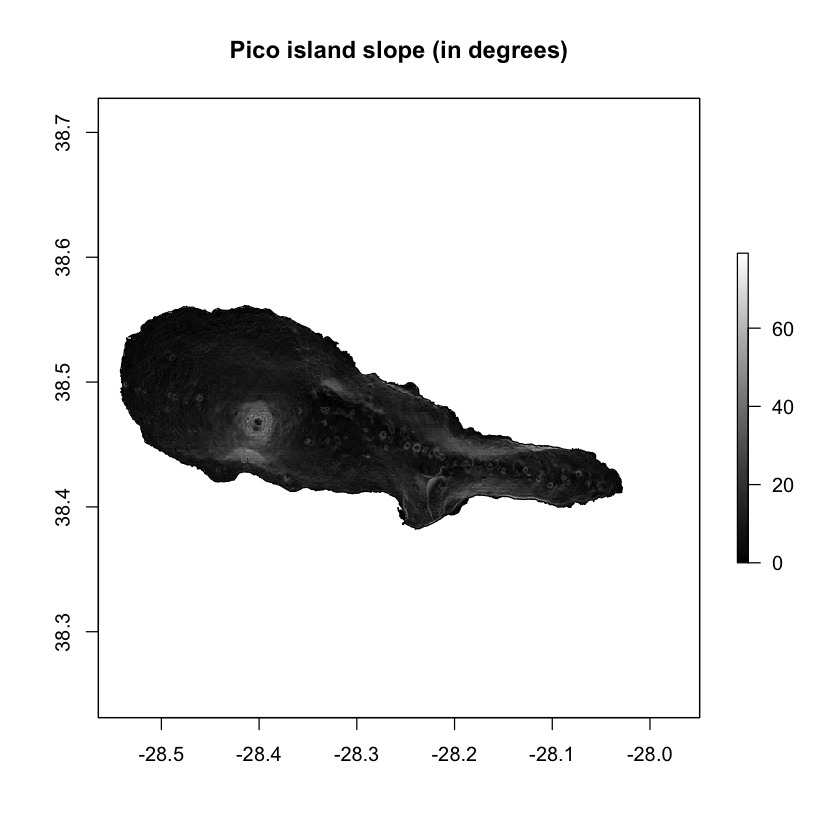

In [3]:
#16-02
# Calculate slope in degrees
pico_slope = terrain(pico_mask, opt = "slope", unit = "degrees")

# View the results
plot(pico_slope, col = gray(seq(0, 1, length = 90)), main="Pico island slope (in degrees)")
plot(pico_out, add = TRUE)

<span style="color:green;"> 
    <h2> 16.2. Aspect of terrain </h2>
</span>

In [ ]:
#16-03
# Calculate aspect of the terrain
pico_aspect = terrain(pico_mask, opt = "aspect")

# Colours and breaks for the plot
at = c(0, 45, 90, 135, 180, 225, 270, 315, 360)
labels = c("N", "NE", "E", "SE", "S", "SW", "W", "NW", "N")
fill_colors = c(rgb(141, 160, 203, maxColorValue = 255),
                rgb(171, 217, 233, maxColorValue = 255),
                rgb(255, 255, 191, maxColorValue = 255),
                rgb(254, 224, 139, maxColorValue = 255),
                rgb(253, 174, 97, maxColorValue = 255),
                rgb(244, 109, 67, maxColorValue = 255),
                rgb(213, 62, 79, maxColorValue = 255),
                rgb(158, 1, 66, maxColorValue = 255),
                rgb(141, 160, 203, maxColorValue = 255))

# View the results
plot(pico_aspect, col = fill_colors, legend = FALSE,
main="Pico island aspect (Orientation of slopes)")
plot(pico_out, add=TRUE)

# Create the legend
legend("top", legend = labels, fill = fill_colors, title = "Orientation", horiz = TRUE, cex = 0.6)

<span style="color:green;"> 
    <h2> 16.3 Hillshade of terrain </h2>
</span>

In [ ]:
#16-04
# Calculate slope in radians
pico_slope_rad = rast(terrain(pico_mask, opt = "slope", unit = "radians"))

# Calculate aspect of the terrain in radians
pico_aspect_rad = rast(terrain(pico_mask, opt = "aspect", unit = "radians"))

# Calculate hillshade of the terrain
pico_hillshade = shade( pico_slope_rad, pico_aspect_rad, angle = 25, direction = 45)

# View the results
plot(pico_hillshade, main = "Pico island Hillshade", col = gray(seq(0, 1, length = 10)), legend = FALSE)

<span style="color:green;"> 
    <h2> 16.4 Terrain ruggedness index (TRI) </h2>
</span>

In [ ]:
#16-05
# Calculate TRI of the terrain
pico_tri = terrain(pico_mask, v = "tri")

# View the results
plot(pico_tri, 
     col = topo.colors(n = 10), 
     main = "Pico Island Ruggedness")

<span style="color:blue;"> 
    <h1> References </h1>
</span>

Tang, J.; & Pilesjö, P. (2011). Estimating slope from raster data: A test of eight different algorithms in flat, undulating and steep terrain. In C. A. Brebbia (Ed.), River Basin Management VI (Vol. 146, pp. 143-154). (Transactions on Ecology and the Environment; Vol. 146). WIT Press. <a href="https://doi.org/10.2495/RM110131">https://doi.org/10.2495/RM110131</a>

Ritter, P. (1987). A vector-based slope and aspect generation algorithm. Photogrammetric Engineering and Remote Sensing 53: 1109-1111.

Horn, B. (1981). Hill shading and the reflectance map. Proceedings of the IEEE 69(1):14-47.

Nunes, J. (2020). Geology and volcanology of Pico Island (Azores, Portugal): A field guide. In Advances in Natural Hazards and Hydrological Risks: Meeting the Challenge: Proceedings of the 2nd International Workshop on Natural Hazards (NATHAZ'19), Pico Island—Azores 2019 (pp. 183-192). Springer International Publishing.

Riley, S.; DeGloria, S.; Elliot, R. (1999). A terrain ruggedness index that quantifies topographic heterogeneity, Intermountain Journal of Sciences 5(1-4):23-27.